# prediction without normalized data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

model = tf.keras.models.load_model('/home/junkai/potts/data20200918q_3/modelq3.h5')

class data_generator (keras.utils.Sequence):
    def __init__(self,path,fname_list,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.batch_size = batch_size

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([np.load(self.path+file) for file in batch_x])

2.2.0


In [2]:
def show_graphs(cwd):
    fname = os.path.join(cwd,'test_dataset.npz')

    train_datasets = np.load(fname)
    X,T = [train_datasets[i] for i in train_datasets.files]

    test_dir = os.path.join(cwd,'test/')
    batch_size = 50
    test_generator = data_generator(test_dir,X,batch_size)

    ypred = model.predict(test_generator)
    probability = ypred.flatten()

    smoothed_prob =[]
    for i in range(len(probability))[::1000]:
        ans = np.sum(probability[i:i+1000])/1000
        smoothed_prob.append(ans)

    Tini = 0.0
    Tlast = 2.0
    T = np.linspace(Tini,Tlast,len(smoothed_prob))
    
    # plot graph
    fig=plt.figure(figsize=(12,6))

    fname = os.path.join(cwd,'run_gen_data.txt')
    q = cwd.split('/')[-2][-1]
    T,M = np.loadtxt(fname).T[0:2]
    ax1 = plt.subplot(1,2,1)
    ax1.set_title('MC simulated magnetization for q = {}'.format(q))
    ax1.plot(T,M,'r-o',label='simulated magnetization')
    plt.legend()

    ax2 = plt.subplot(1,2,2)
    ax2.set_title('model trained for q=3, prediction on q = {}'.format(q))
    ax2.plot(T, smoothed_prob, '-o',label='probability')
    plt.legend()

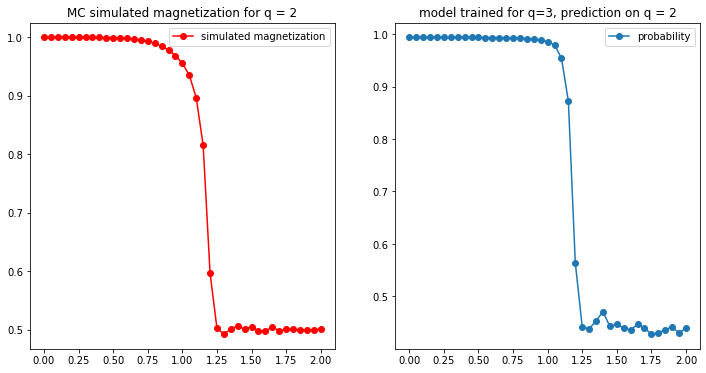

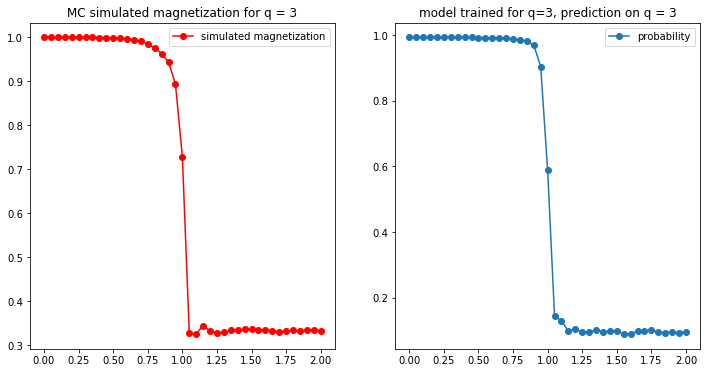

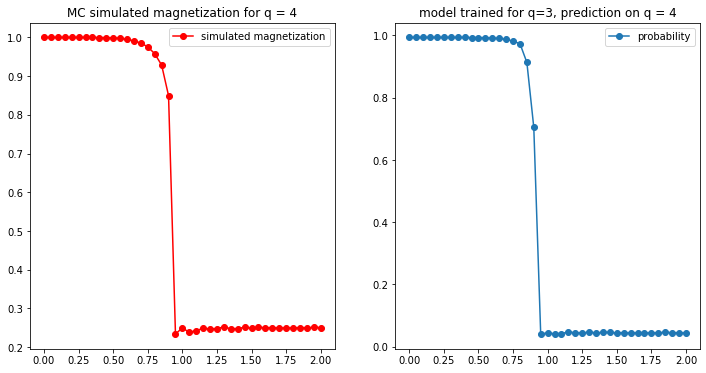

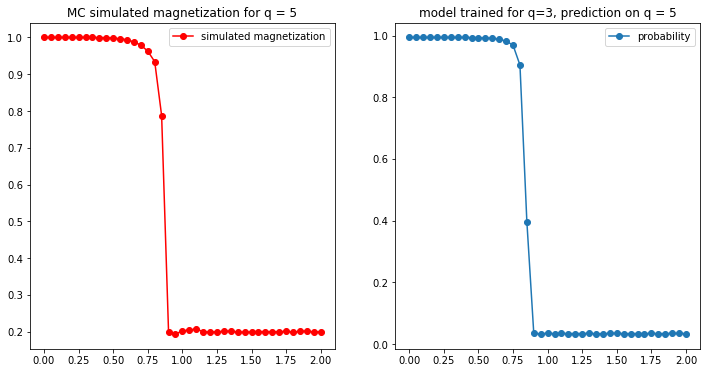

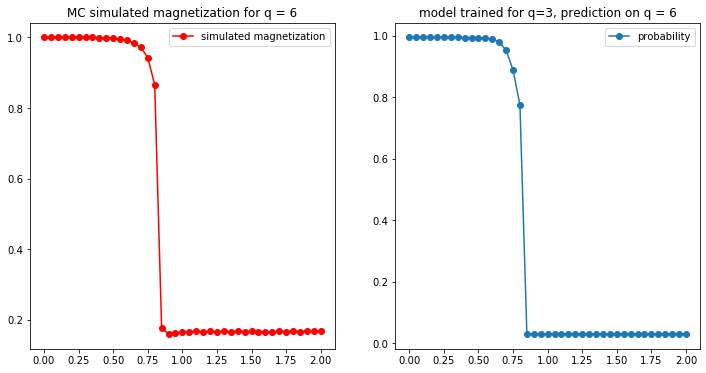

In [3]:
file_list = ['/home/junkai/potts/data20200918q_2/','/home/junkai/potts/data20200918q_3/','/home/junkai/potts/data20200918q_4/','/home/junkai/potts/data20200918q_5/','/home/junkai/potts/data20200918q_6/']
for cwd in file_list:
    show_graphs(cwd)

# prediction with normalized data

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

fname = '/home/junkai/potts/data20200918q_3/model2q3.h5'
model = tf.keras.models.load_model(fname)
q = int(fname.split('.')[-2][-1])

class data_generator (keras.utils.Sequence):
    def __init__(self,path,fname_list,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.batch_size = batch_size

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]

        #return np.array([np.load(self.path+file) for file in batch_x])
        return (np.array([np.load(self.path+file) for file in batch_x])-1)/(q-1)

2.2.0


In [8]:
def show_graphs(cwd):
    fname = os.path.join(cwd,'test_dataset.npz')

    train_datasets = np.load(fname)
    X,T = [train_datasets[i] for i in train_datasets.files]

    test_dir = os.path.join(cwd,'test/')
    batch_size = 50
    test_generator = data_generator(test_dir,X,batch_size)

    ypred = model.predict(test_generator)
    probability = ypred.flatten()

    smoothed_prob =[]
    for i in range(len(probability))[::1000]:
        ans = np.sum(probability[i:i+1000])/1000
        smoothed_prob.append(ans)

    Tini = 0.0
    Tlast = 2.0
    T = np.linspace(Tini,Tlast,len(smoothed_prob))
    
    # plot graph
    fig=plt.figure(figsize=(12,6))

    fname = os.path.join(cwd,'run_gen_data.txt')
    q = cwd.split('/')[-2][-1]
    T,M = np.loadtxt(fname).T[0:2]
    ax1 = plt.subplot(1,2,1)
    ax1.set_title('MC simulated magnetization for q = {}'.format(q))
    ax1.plot(T,M,'r-o',label='simulated magnetization')
    plt.legend()

    ax2 = plt.subplot(1,2,2)
    ax2.set_title('model trained for q=3, prediction on q = {}'.format(q))
    ax2.plot(T, smoothed_prob, '-o',label='probability')
    plt.legend()

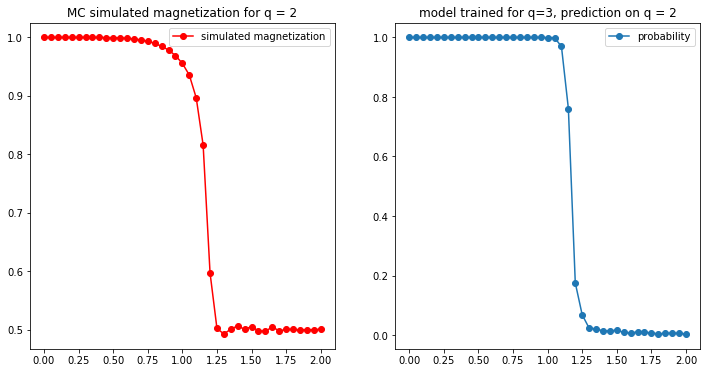

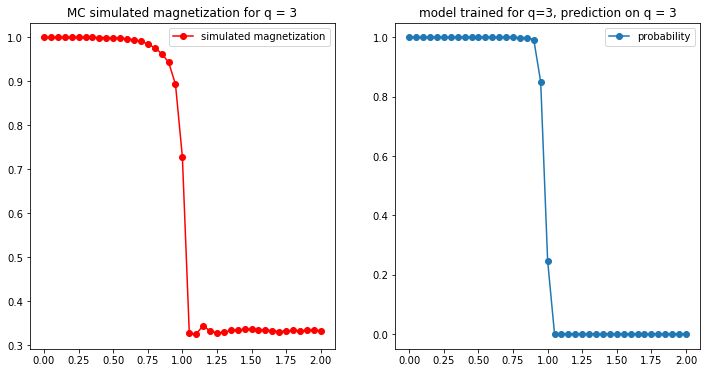

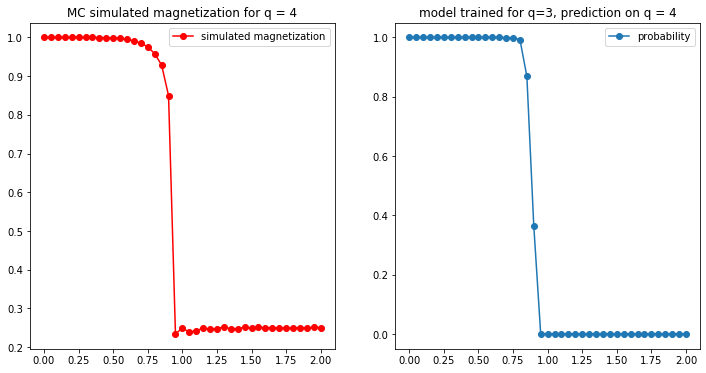

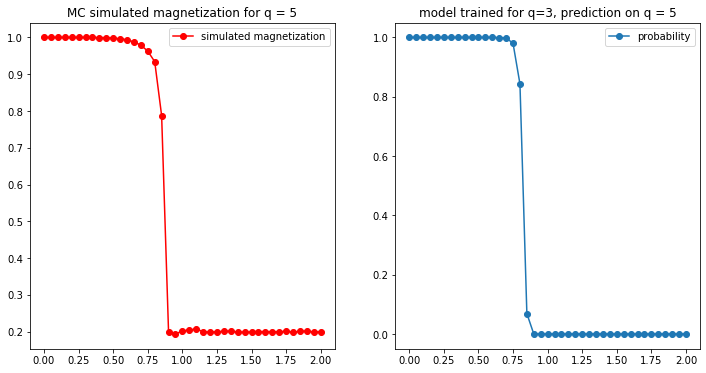

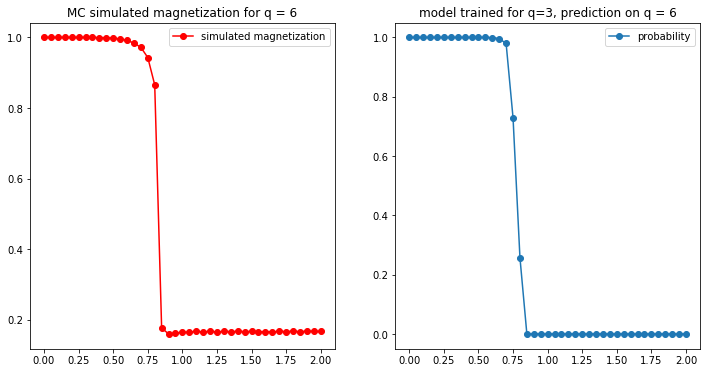

In [13]:
file_list = ['/home/junkai/potts/data20200918q_2/','/home/junkai/potts/data20200918q_3/','/home/junkai/potts/data20200918q_4/','/home/junkai/potts/data20200918q_5/','/home/junkai/potts/data20200918q_6/']
for cwd in file_list:
    show_graphs(cwd)

# test

In [2]:
### Evaluates the trained model using a set of fresh data in data_to_verify/ ####

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.2.0


In [3]:
cwd = '/home/junkai/potts/data20200918q_3/'
fname = os.path.join(cwd,'test_dataset.npz')

train_datasets = np.load(fname)
print(train_datasets.files)
X,T = [train_datasets[i] for i in train_datasets.files]

['x_test', 'x_temp']


In [4]:
#fname = os.path.join(cwd,'modelq3.h5')
model = tf.keras.models.load_model('/home/junkai/potts/data20200918q_3/modelq3.h5')

In [5]:
class data_generator (keras.utils.Sequence):
    def __init__(self,path,fname_list,batch_size,):
        self.path = path
        self.fname_list = fname_list
        self.batch_size = batch_size

    
    def __len__(self):
        return (np.ceil(len(self.fname_list) / float(self.batch_size))).astype(np.int)


    def __getitem__ (self,idx):
        batch_x = self.fname_list [idx * self.batch_size : (idx+1) * self.batch_size]

        return np.array([np.load(self.path+file) for file in batch_x])

In [6]:
test_dir = os.path.join(cwd,'test/')
batch_size = 50
test_generator = data_generator(test_dir,X,batch_size)

In [7]:
ypred = model.predict(test_generator)
probability = ypred.flatten()
T.shape
probability.shape

(41000,)

In [8]:
smoothed_prob =[]
for i in range(len(probability))[::1000]:
    ans = np.sum(probability[i:i+1000])/1000
    smoothed_prob.append(ans)

Tini = 0.0
Tlast = 2.0
T = np.linspace(Tini,Tlast,len(smoothed_prob))

model trained for q=3, prediction on q=2


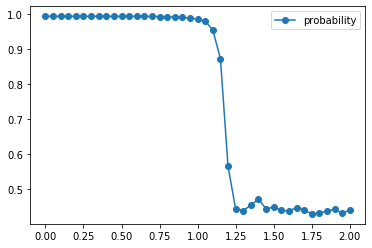

In [10]:
print('model trained for q=3, prediction on q=2')
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

model trained for q=3, prediction on q=3


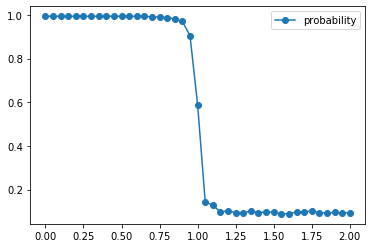

In [10]:
print('model trained for q=3, prediction on q=3')
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

model trained for q=3, prediction on q=4


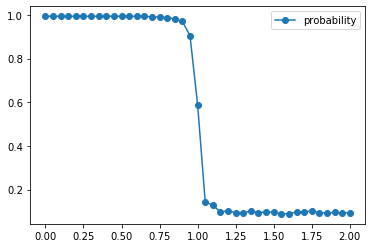

In [9]:
print('model trained for q=3, prediction on q=4')
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

model trained for q=3, prediction on q=5


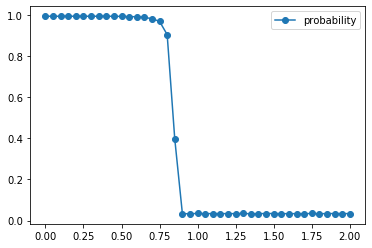

In [15]:
print('model trained for q=3, prediction on q=5')
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()

model trained for q=3, prediction on q=6


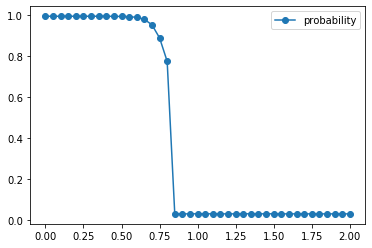

In [20]:
print('model trained for q=3, prediction on q=6')
plt.plot(T, smoothed_prob, '-o',label='probability')
plt.legend()